In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashionmnist = tf.keras.datasets.fashion_mnist

In [3]:
(training_images, training_labels), (test_images, test_labels) = fashionmnist.load_data()

LABEL: 7

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  58  34   0   0   0   2   2   0   5   2   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   2   0  12 139 162  44   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   2   0 122 119 135 174 127   6  40  60  81  76  11   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 

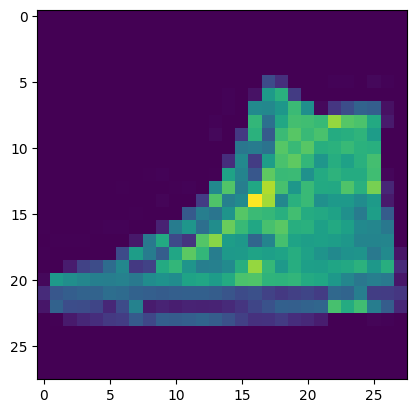

In [4]:
index = 1123

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])

In [5]:
# Normalize the pixel values of the train and test images
training_images = np.reshape(training_images, (training_images.shape[0],28,28,1))
test_images = np.reshape(test_images, (test_images.shape[0],28,28,1))


training_images  = training_images / 255.0
test_images = test_images / 255.0

In [6]:
def convolutional_model():
    ### START CODE HERE

    # Define the model
    model = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
          tf.keras.layers.MaxPooling2D(2, 2),
          tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),

          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(128, activation='relu'),
          tf.keras.layers.Dense(10, activation='softmax')
      
      
      
      
    ])
    ### END CODE HERE

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
        
    return model

In [7]:
# using callback to stop the training once the accuracy reached 99.5%
class myCallback(tf.keras.callbacks.Callback):
    # Define the method that checks the accuracy at the end of each epoch
    def on_epoch_end(self, spoch, logs ={}):
        if(logs.get('accuracy') >= 0.995):
            print("\nReached 99.5% accuracy so cancelling training")
            self.model.stop_training = True
    pass


In [8]:
callbacks = myCallback()
model = convolutional_model()
model.fit(training_images, training_labels, epochs=10, callbacks = [callbacks])

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4809 - accuracy: 0.8246
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3230 - accuracy: 0.8825
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2773 - accuracy: 0.8977
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2484 - accuracy: 0.9081
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2222 - accuracy: 0.9173
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2038 - accuracy: 0.9236
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1866 - accuracy: 0.9291
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1711 - accuracy: 0.9356
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1565 - accuracy: 0.9412
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.142

In [9]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.2797 - accuracy: 0.9090


[0.27966147661209106, 0.9089999794960022]